# Imports

In [1]:
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 45)


In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t))])
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t))])
t = np.array(np.round(t, 2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)

n = np.round((np.random.random(N) * 2).reshape(-1,1), 2)

y = np.array([((np.log(np.abs(2 + x1[t])) - x2[t-1]**2) + 0.02*x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])
y = np.round(y+n, 2)

In [3]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, y), axis=1), 
                       columns=['t', 'x1', 'x2', 'x3', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

dataset.insert(1, '∆t', deltaT)
dataset.head(10)

,t,∆t,x1,x2,x3,y
0,0.07,0.00,1.73,4.60,3.99,5.59
1,0.99,0.92,1.07,3.50,3.60,-17.78
2,2.12,1.13,1.43,3.41,1.31,-10.03
3,3.15,1.03,2.74,1.60,4.48,-8.19
4,4.17,1.02,3.15,3.90,3.50,0.50
5,4.91,0.74,2.34,1.03,0.61,-12.54
6,6.09,1.18,1.18,2.13,3.31,2.33
7,7.13,1.04,0.82,0.28,2.31,-3.12
8,8.16,1.03,4.15,3.54,2.20,1.99
9,9.11,0.95,3.77,3.38,2.23,-5.72


In [70]:
trainset = pd.DataFrame(create_a_row)
trainset

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),t(2),∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.96,1.02,4.35,3.17,0.54,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07
593,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03
594,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87
595,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87,598.06,0.93,0.52,2.26,0.13


In [132]:
window_size = 4
create_a_row = reshape_to_window(dataset,window_size,include_target=True)
create_a_row

None        t(0)  ∆t(0)  x1(0)  x2(0)  x3(0)   y(0)    t(1)  ∆t(1)  x1(1)  x2(1)  \
0      0.07   0.00   1.73   4.60   3.99   5.59    0.99   0.92   1.07   3.50   
1      0.99   0.92   1.07   3.50   3.60 -17.78    2.12   1.13   1.43   3.41   
2      2.12   1.13   1.43   3.41   1.31 -10.03    3.15   1.03   2.74   1.60   
3      3.15   1.03   2.74   1.60   4.48  -8.19    4.17   1.02   3.15   3.90   
4      4.17   1.02   3.15   3.90   3.50   0.50    4.91   0.74   2.34   1.03   
..      ...    ...    ...    ...    ...    ...     ...    ...    ...    ...   
592  591.93   0.99   2.51   2.28   4.30   0.85  593.06   1.13   4.47   4.88   
593  593.06   1.13   4.47   4.88   0.63  -2.48  594.14   1.08   4.65   3.15   
594  594.14   1.08   4.65   3.15   2.02 -19.69  595.02   0.88   4.63   2.77   
595  595.02   0.88   4.63   2.77   1.60   2.45  596.16   1.14   4.31   2.75   
596  596.16   1.14   4.31   2.75   0.43  -2.58  597.06   0.90   0.75   1.53   

     ...  ∆t(2)  x1(2)  x2(2)  x3(2)   y(2)   

,t(0),∆t(0),x1(0),x2(0),x3(0),y(0),t(1),∆t(1),x1(1),x2(1),...,∆t(2),x1(2),x2(2),x3(2),y(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.07,0.00,1.73,4.60,3.99,5.59,0.99,0.92,1.07,3.50,...,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,4.48
1,0.99,0.92,1.07,3.50,3.60,-17.78,2.12,1.13,1.43,3.41,...,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,3.50
2,2.12,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,...,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,0.61
3,3.15,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,...,0.74,2.34,1.03,0.61,-12.54,6.09,1.18,1.18,2.13,3.31
4,4.17,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,...,1.18,1.18,2.13,3.31,2.33,7.13,1.04,0.82,0.28,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.93,0.99,2.51,2.28,4.30,0.85,593.06,1.13,4.47,4.88,...,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,1.60
593,593.06,1.13,4.47,4.88,0.63,-2.48,594.14,1.08,4.65,3.15,...,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,0.43
594,594.14,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,...,1.14,4.31,2.75,0.43,-2.58,597.06,0.90,0.75,1.53,2.81
595,595.02,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,...,0.90,0.75,1.53,2.81,-2.38,598.12,1.06,0.13,0.21,4.99


In [10]:
create_target_value = dataset["y"][window_size-1:].values

In [11]:
trainset["target_y"] = create_target_value

In [12]:
trainset.loc[0:500,:]

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),...,∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3),target_y
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,...,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,-4.31
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,...,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,-6.75
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,...,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,-16.80
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,...,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,-19.77
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,...,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.02,1.04,3.51,0.20,0.80,497.01,0.99,0.11,2.91,1.95,...,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,-0.14
497,497.01,0.99,0.11,2.91,1.95,498.22,1.21,3.15,1.45,2.75,...,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,-6.10
498,498.22,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,...,1.18,2.80,1.88,4.14,501.15,1.04,3.55,3.49,2.76,-0.64
499,498.93,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,...,1.04,3.55,3.49,2.76,502.08,0.93,1.20,0.54,4.98,-7.79


In [13]:
ml_trainset = trainset.loc[0:500,:]
ml_testset = trainset.loc[501:,:]

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(ml_trainset.iloc[:,:-1], ml_trainset.iloc[:,-1])

t0 = time.time()
lr_y = ml_testset['target_y'].values
lr_y_fit = lr_model.predict(ml_trainset.iloc[:,:-1])
lr_y_pred = lr_model.predict(ml_testset.iloc[:,:-1])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 2.79
Time to train = 0.00 seconds


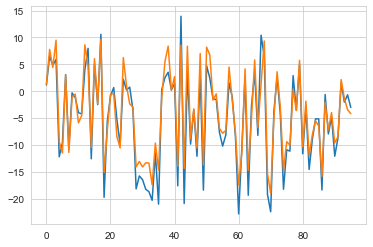

In [19]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(lr_y))],lr_y,label = "Actual y")
plt.plot([i for i in range(len(lr_y))],lr_y_pred,label = "Predicted y")
plt.show()

# Helper functions for reshaping

In [2]:
def reshape_to_window(dataset,window_size,target_value = "y", include_target = False,drop_columns = None): #hourly scope
    columns_size = dataset.shape[1]
    create_a_row = []
    columns_to_save_after_proceed = None
    target_values = dataset.iloc[window_size-1:,][target_value].values
    if(drop_columns!=None):
        columns_to_save_after_proceed = dataset.iloc[window_size-1:,][drop_columns]
        columns_to_save_after_proceed = columns_to_save_after_proceed.reset_index(drop = True)
        dataset = dataset.drop(columns = drop_columns,axis = 1)
    for r in (range(dataset.shape[0]-window_size+1)):
        create_a_row.append({})
        for row in range(window_size):
            for col in dataset.columns:
                if(col==target_value and row == window_size-1):
                    continue
                elif(col == target_value and include_target == False):
                    continue
                else:
                    create_a_row[r][f"{col}({row})"] = dataset[col][dataset[col].index[row+r]]
    
    create_a_row = pd.DataFrame(create_a_row)
    result = create_a_row
    #print(len(target_values))
    result[target_value] = target_values 
    if(drop_columns!=None):
        result = pd.concat([columns_to_save_after_proceed,create_a_row],axis = 1)
    return result

def reshape_whole_table(dataset,window_size,target_value = "y", include_target = False,drop_columns = None):
    hours = list(set(dataset["hour"]))
    xs = list(set(dataset["x"]))
    ys = list(set(dataset["y"]))
    
    result = pd.DataFrame()
    
    for x in xs:
        for y in ys:
            temp = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y))]
            temp = reshape_to_window(temp,window_size=window_size,include_target=include_target,drop_columns=drop_columns,target_value=target_value)
            result = pd.concat([result,temp])
    return result
    
def fill_with_art_hours(subset, dataset, fill_value = 0,number_of_hours = 3):
    '''
    
    :param subset: subset that contains non-windowed values of output emissions without first number of hours
                    to fill them artificially with some mean value
    :param dataset: whole dataset, where we will take data for missing hours from
    :param number_of_hours: how many hours should be additionally filled
    :return: subset, with appended values
    '''
    result = pd.DataFrame()
    for x in tqdm(set(subset["x"])):
        for y in set(subset["y"]):
            xy_rows = subset.loc[(( subset["x"] == x) & (subset["y"] == y))]
            #print(xy_rows)
            if(xy_rows.shape[0] == 0):
                continue
            else:
                minhour = min(xy_rows["hour"])
                for ihour in range(minhour-number_of_hours,minhour,1):
                    xyhour_row = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y) & (dataset["hour"] == ihour))]
                    new_xyhour_row = xyhour_row.loc[:,~xyhour_row.columns.str.contains('_out', case=False)]
                    #print(ihour,x,y)
                    #print(xyhour_row)
                    #Fill the emission output
                    if(new_xyhour_row["building_height"].iat[0]>=1):
                        new_xyhour_row["emission_value_out"] = 0
                    else:
                        new_xyhour_row["emission_value_out"] = fill_value
                        
                    #Fill all neighbours for emission output
                    right = dataset.loc[(( dataset["x"] == x+1) & (dataset["y"] == y))]
                    if(right.shape[0]==0):
                        new_xyhour_row["nbr_out"] = 0
                    elif(right["building_height"].iat[0]>=1):
                        new_xyhour_row["nbr_out"] = 0
                    else:
                        new_xyhour_row["nbr_out"] = fill_value
                    
                    left = dataset.loc[(( dataset["x"] == x-1) & (dataset["y"] == y))]
                    if(left.shape[0]==0):
                        new_xyhour_row["nbl_out"] = 0
                    elif(left["building_height"].iat[0]>=1):
                        new_xyhour_row["nbl_out"] = 0
                    else:
                        new_xyhour_row["nbl_out"] = fill_value
                        
                    up = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y-1))]
                    if(up.shape[0]==0):
                        new_xyhour_row["nbu_out"] = 0
                    elif(up["building_height"].iat[0]>=1):
                        new_xyhour_row["nbu_out"] = 0
                    else:
                        new_xyhour_row["nbu_out"] = fill_value
                    
                    down = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y+1))]
                    if(down.shape[0]==0):
                        new_xyhour_row["nbd_out"] = 0
                    elif(down["building_height"].iat[0]>=1):
                        new_xyhour_row["nbd_out"] = 0
                    else:
                        new_xyhour_row["nbd_out"] = fill_value
                    xy_rows = pd.concat([xy_rows,new_xyhour_row])
                result = pd.concat([result,xy_rows])
               
    return result

def get_neighbours(df,x,y,hour,hour_name = "hour(3)",target_name = "emission_value"):
    
    result = pd.DataFrame()
    
    df_cell = df.loc[(df["x"] ==x) & (df["y"] ==y) & (df[hour_name] == hour)]
    
    
    new_row_right = df.loc[(df["x"] ==x+1) & (df["y"] ==y)& (df[hour_name] == hour)]
    #print(new_row_right)
   #print(new_row_right)
    if(len(new_row_right) == 0):
        new_row_right = pd.DataFrame({"x" : x+1 ,
                                      "y" : y ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbr"}, index=[0])
    else:
        new_row_right = pd.DataFrame({"x" : x+1 ,
                                      "y" : y ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbr" }, index=[0])
    
    
    new_row_left = df.loc[(df["x"] ==x-1) & (df["y"] ==y)& (df[hour_name] == hour)]
    if(len(new_row_left) == 0):
        new_row_left = pd.DataFrame({"x" : x-1 ,
                                      "y" : y ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbl"}, index=[0])
    else:
        new_row_left = pd.DataFrame({"x" : x-1 ,
                                      "y" : y ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbl" }, index=[0])
    
    
    new_row_up = df.loc[(df["x"] ==x) & (df["y"] ==y-1)& (df[hour_name] == hour)]
    if(len(new_row_up) == 0):
        new_row_up = pd.DataFrame({"x" : x ,
                                      "y" : y-1 ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbu"}, index=[0])
    else:
        new_row_up = pd.DataFrame({"x" : x ,
                                      "y" : y-1 ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbu" }, index=[0])
    
    
    new_row_down = df.loc[(df["x"] ==x) & (df["y"] ==y+1)& (df[hour_name] == hour)]
    if(len(new_row_down) == 0):
        new_row_down = pd.DataFrame({"x" : x ,
                                      "y" : y+1 ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbd"}, index=[0])
    else:
        new_row_down = pd.DataFrame({"x" : x ,
                                      "y" : y+1 ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbd" }, index=[0])
        
    result = pd.concat([new_row_right,new_row_left,new_row_up,new_row_down])
    return result


    

# Chained predictions function

In [84]:
def chained_predict(model,dataset, testset,max_hour = 48, predict_name = None,regex_to_filter = "emission_value_out$"):
    '''
    
    :param model: ML model that have predict function
    :param testset:  windowed dataset that contains only 1 row!
    :param max_hour:  stop condition
    :param predict_name: if model uses other name for predict
    :return: dataset with predicted values for emission_output
    '''
    # Check if the model has a custom prediction method name
    if predict_name!= None:
        predict_method = getattr(model, 'custom_predict')
    else:
        predict_method = getattr(model, 'predict')
    result_df = testset.copy()
    res_predictions = []
    for ihour in range(min(set(result_df["hour(3)"])),max_hour,1):
        
        # Call the chosen predict method
        #print(result_df)
        #result_df = result_df.reset_index(drop=True)
        predict_df = result_df.loc[result_df["hour(3)"] == ihour]
        #print(result_df.index.duplicated().any())

        filtered_columns = predict_df.filter(regex='emission_value_out$').columns

        predictions = predict_method(predict_df.loc[:,~predict_df.columns.isin(filtered_columns)])
        if(ihour == min(set(result_df["hour(3)"]))):
            result_df["pred_emission_value_out"] = predictions
            predict_df["pred_emission_value_out"] = predictions
            #print("i am here")
        else:
            #print((predictions))
            #print(result_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"])
            #return predict_df
            result_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"] = predictions
            #predict_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"] = predictions
        predict_df = result_df.loc[result_df["hour(3)"] == ihour]
        if(ihour == max_hour-1):
            break
        #res_predictions = res_predictions+list(predictions)
        new_rows = pd.DataFrame()
        new_rows["x"] = predict_df["x"]
        new_rows["y"] = predict_df["y"]
        new_rows["building_height"] = predict_df["building_height"]
        new_rows["wind"] = predict_df["wind"]
        new_rows["nbd(0)"] = predict_df["nbd(1)"]
        new_rows["nbu(0)"] = predict_df["nbu(1)"]
        new_rows["nbl(0)"] = predict_df["nbl(1)"]
        new_rows["nbr(0)"] = predict_df["nbr(1)"]
        new_rows["nbd_out(0)"] = predict_df["nbd_out(1)"]
        new_rows["nbu_out(0)"] = predict_df["nbu_out(1)"]
        new_rows["nbl_out(0)"] = predict_df["nbl_out(1)"]
        new_rows["nbr_out(0)"] = predict_df["nbr_out(1)"]
        new_rows["hour(0)"] = predict_df["hour(1)"]
        new_rows["emission_value(0)"] = predict_df["emission_value(1)"]
        new_rows["emission_value_out(0)"] = predict_df["emission_value_out(1)"]
        
        new_rows["nbd(1)"] = predict_df["nbd(2)"]
        new_rows["nbu(1)"] = predict_df["nbu(2)"]
        new_rows["nbl(1)"] = predict_df["nbl(2)"]
        new_rows["nbr(1)"] = predict_df["nbr(2)"]
        new_rows["nbd_out(1)"] = predict_df["nbd_out(2)"]
        new_rows["nbu_out(1)"] = predict_df["nbu_out(2)"]
        new_rows["nbl_out(1)"] = predict_df["nbl_out(2)"]
        new_rows["nbr_out(1)"] = predict_df["nbr_out(2)"]
        new_rows["hour(1)"] = predict_df["hour(2)"]
        new_rows["emission_value(1)"] = predict_df["emission_value(2)"]
        new_rows["emission_value_out(1)"] = predict_df["emission_value_out(2)"]
        
        new_rows["nbd(2)"] = predict_df["nbd(3)"]
        new_rows["nbu(2)"] = predict_df["nbu(3)"]
        new_rows["nbl(2)"] = predict_df["nbl(3)"]
        new_rows["nbr(2)"] = predict_df["nbr(3)"]
        new_rows["hour(2)"] = predict_df["hour(3)"]
        new_rows["emission_value(2)"] = predict_df["emission_value(3)"]
        new_rows["emission_value_out(2)"] = predictions
        
        to_join = pd.DataFrame()
        
        
        for x in (set(new_rows["x"])):
            for y in set(new_rows["y"]):
                temp = pd.DataFrame()
                xyihour_dataset = dataset.loc[(dataset["hour"] == ihour) & (dataset["x"] == x) & (dataset["y"] == y) ]
                nbrs = get_neighbours(predict_df,x,y,hour = ihour,hour_name="hour(3)",target_name="pred_emission_value_out")
                temp = pd.DataFrame({"nbd_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbd"]["pred_emission_value_out"].values[0]] ,
                                      "nbu_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbu"]["pred_emission_value_out"].values[0]],
                                      "nbl_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbl"]["pred_emission_value_out"].values[0]] ,
                                      "nbr_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbr"]["pred_emission_value_out"].values[0]],
                                      "emission_value(3)" : [xyihour_dataset["emission_value"].values[0]],
                                     "nbd(3)" : [xyihour_dataset["nbd"].values[0]], 
                                     "nbl(3)" : [xyihour_dataset["nbl"].values[0]],
                                     "nbu(3)" : [xyihour_dataset["nbu"].values[0]],
                                     "nbr(3)" : [xyihour_dataset["nbr"].values[0]],
                                     "emission_value_out" : [xyihour_dataset["emission_value_out"].values[0]]})
                to_join = pd.concat([to_join,temp])
                #print(to_join)
            
        new_rows["hour(3)"] =  ihour+1
        new_rows["pred_emission_value_out"] = 0
        #new_rows["emission_value_out"] = 0
        #print(to_join)
        new_rows = pd.concat([new_rows,to_join],axis = 1)
        result_df = pd.concat([result_df,new_rows])
        
    return result_df

In [165]:
day_trainset.loc[(( day_trainset["x"] == 145) & (day_trainset["y"] == 245)) & (day_trainset["hour"]==29)]["nbr"].values[0]

0.0004769359075

# My dataframes

In [4]:
spec1_in = pd.read_csv("../data/result1_species_in.csv",sep = ";")
res_cols = spec1_in.columns[0:3].values.tolist()+spec1_in.columns[4:].values.tolist()+[spec1_in.columns[3]]
spec1_in = spec1_in[res_cols]
spec1_in["wind"] = 2.4573338 # simulate wind
spec1_in

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334


In [5]:
spec1_out = pd.read_csv("../data/result1_species_out.csv",sep = ";")
spec1_out.columns = spec1_out.columns+"_out" #renaming columns
res_cols = spec1_out.columns[0:3].values.tolist()+spec1_out.columns[4:].values.tolist()+[spec1_out.columns[3]]
spec1_out = spec1_out[res_cols]
spec1_out

,x_out,y_out,hour_out,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.000000,0.018957,0.018886,0.000000,0.018918


### Join in and out table and prepare regression

In [6]:
spec1_trainset = pd.concat((spec1_in,spec1_out[spec1_out.columns[3:]]),axis=1)
spec1_trainset

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.018957,0.018886,0.000000,0.018918


In [7]:
test2525 = spec1_trainset.loc[(( spec1_trainset["x"] <= 150) & (spec1_trainset["y"] <= 250))]
test2525

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.010604,0.0,0.0,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.009498,0.0,0.0,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.009675,0.0,0.0,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.015073,0.0,0.0,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.013605,0.0,0.0,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362443,150,250,43,0.0,0.0,0.0,0.0,0.0,22.634052,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362444,150,250,44,0.0,0.0,0.0,0.0,0.0,22.634052,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362445,150,250,45,0.0,0.0,0.0,0.0,0.0,22.634052,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362446,150,250,46,0.0,0.0,0.0,0.0,0.0,22.634052,2.457334,0.000000,0.0,0.0,0.000000,0.000000


In [8]:
window_size = 4
ml_spec1_trainset = reshape_whole_table(test2525,window_size,target_value="emission_value_out",drop_columns=["x","y","building_height","wind"],include_target=True)
ml_spec1_trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),...,hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),nbr_out(3),nbl_out(3),nbu_out(3),nbd_out(3),emission_value_out
0,128,200,0.000000,2.457334,0,0.0,0.000000,0.0,0.0,0.0,0.010295,0.010309,0.0,0.010325,0.010305,1,0.0,0.000000,0.0,0.0,0.0,0.009379,...,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577
1,128,200,0.000000,2.457334,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,...,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383
2,128,200,0.000000,2.457334,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,...,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018
3,128,200,0.000000,2.457334,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,...,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010123,0.010200,0.0,0.010206,0.010161
4,128,200,0.000000,2.457334,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,...,6,0.0,0.000000,0.0,0.0,0.0,0.010123,0.010200,0.0,0.010206,0.010161,7,0.0,0.000000,0.0,0.0,0.0,0.010164,0.010212,0.0,0.010182,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,24.099998,2.457334,40,0.0,0.000415,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,41,0.0,0.000266,0.0,0.0,0.0,0.000000,...,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
41,127,250,24.099998,2.457334,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,...,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
42,127,250,24.099998,2.457334,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,...,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
43,127,250,24.099998,2.457334,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,...,45,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,46,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


But out emiission of values of neighnbours in (3) contain additional information of emission value in certain cell, that we doesn't have, so we need to filter them out 

In [9]:

ml_spec1_trainset = ml_spec1_trainset.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_spec1_trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,128,200,0.000000,2.457334,0,0.0,0.000000,0.0,0.0,0.0,0.010295,0.010309,0.0,0.010325,0.010305,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013577
1,128,200,0.000000,2.457334,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012383
2,128,200,0.000000,2.457334,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010018
3,128,200,0.000000,2.457334,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010161
4,128,200,0.000000,2.457334,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010123,0.010200,0.0,0.010206,0.010161,7,0.0,0.000000,0.0,0.0,0.0,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,24.099998,2.457334,40,0.0,0.000415,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000
41,127,250,24.099998,2.457334,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000
42,127,250,24.099998,2.457334,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000
43,127,250,24.099998,2.457334,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,46,0.0,0.000000,0.0,0.0,0.0,0.000000


In [10]:
trainset = ml_spec1_trainset
testset = trainset
trainset
trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,128,200,0.000000,2.457334,0,0.0,0.000000,0.0,0.0,0.0,0.010295,0.010309,0.0,0.010325,0.010305,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013577
1,128,200,0.000000,2.457334,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012383
2,128,200,0.000000,2.457334,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010018
3,128,200,0.000000,2.457334,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010161
4,128,200,0.000000,2.457334,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010123,0.010200,0.0,0.010206,0.010161,7,0.0,0.000000,0.0,0.0,0.0,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,24.099998,2.457334,40,0.0,0.000415,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000
41,127,250,24.099998,2.457334,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000
42,127,250,24.099998,2.457334,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000
43,127,250,24.099998,2.457334,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,46,0.0,0.000000,0.0,0.0,0.0,0.000000


## Linear Regression

### Train on train grid(can be a cell)

In [93]:
filtered_columns = trainset.filter(regex='emission_value_out$')
trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)]

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,128,200,0.000000,2.457334,0,0.0,0.000000,0.0,0.0,0.0,0.010295,0.010309,0.0,0.010325,0.010305,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0
1,128,200,0.000000,2.457334,1,0.0,0.000000,0.0,0.0,0.0,0.009379,0.009383,0.0,0.009387,0.009381,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0
2,128,200,0.000000,2.457334,2,0.0,0.000000,0.0,0.0,0.0,0.009460,0.009484,0.0,0.009473,0.009466,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0
3,128,200,0.000000,2.457334,3,0.0,0.000000,0.0,0.0,0.0,0.013523,0.013653,0.0,0.013631,0.013577,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0
4,128,200,0.000000,2.457334,4,0.0,0.000000,0.0,0.0,0.0,0.012360,0.012397,0.0,0.012427,0.012383,5,0.0,0.000000,0.0,0.0,0.0,0.010016,0.010016,0.0,0.010042,0.010018,6,0.0,0.000000,0.0,0.0,0.0,0.010123,0.010200,0.0,0.010206,0.010161,7,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,24.099998,2.457334,40,0.0,0.000415,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0
41,127,250,24.099998,2.457334,41,0.0,0.000266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0
42,127,250,24.099998,2.457334,42,0.0,0.000354,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0
43,127,250,24.099998,2.457334,43,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44,0.0,0.000089,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,45,0.0,0.000177,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,46,0.0,0.000000,0.0,0.0,0.0


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = LinearRegression()

filtered_columns = trainset.filter(regex='emission_value_out$')#trainset.filter(regex='nb.*out|emission_value_out$')
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)] , trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)])
lr_y_pred = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0020980900
MAE = 0.0011209107
Time to train = 0.15 seconds


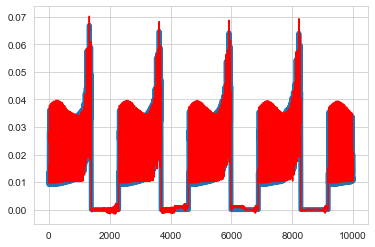

In [72]:
from matplotlib import pyplot as plt
(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on test grid(can be a cell)

In [13]:
testset3030  = spec1_trainset.loc[(spec1_trainset["x"] > 150) & (spec1_trainset["y"] >250)]
testset3030

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
369648,151,251,0,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369649,151,251,1,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369650,151,251,2,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369651,151,251,3,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369652,151,251,4,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.011800,0.011717,0.0,0.011732
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.014070,0.013944,0.0,0.013980
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.017873,0.017751,0.0,0.017794
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.018957,0.018886,0.0,0.018918


In [14]:
window_size = 4
ml_testset3030 = reshape_whole_table(testset3030,window_size =window_size,drop_columns=["x","y","building_height","wind"],target_value="emission_value_out",include_target=True)
ml_testset3030 = ml_testset3030.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_testset3030


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,151,251,19.335487,2.457334,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.000000
1,151,251,19.335487,2.457334,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.000000
2,151,251,19.335487,2.457334,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.000000
3,151,251,19.335487,2.457334,3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,6,0.0,0.0,0.0,0.0,0.0,0.000000
4,151,251,19.335487,2.457334,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,7,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,249,349,0.000000,2.457334,40,0.0,0.0,0.0,0.0,0.0,0.0,0.008415,0.008396,0.0,0.008390,41,0.0,0.0,0.0,0.0,0.0,0.0,0.009018,0.008957,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0,0.0,0.009607,0.009568,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0,0.011732
41,249,349,0.000000,2.457334,41,0.0,0.0,0.0,0.0,0.0,0.0,0.009018,0.008957,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0,0.0,0.009607,0.009568,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0,0.0,0.011800,0.011717,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0,0.013980
42,249,349,0.000000,2.457334,42,0.0,0.0,0.0,0.0,0.0,0.0,0.009607,0.009568,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0,0.0,0.011800,0.011717,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0,0.0,0.014070,0.013944,0.0,0.013980,45,0.0,0.0,0.0,0.0,0.0,0.017794
43,249,349,0.000000,2.457334,43,0.0,0.0,0.0,0.0,0.0,0.0,0.011800,0.011717,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0,0.0,0.014070,0.013944,0.0,0.013980,45,0.0,0.0,0.0,0.0,0.0,0.0,0.017873,0.017751,0.0,0.017794,46,0.0,0.0,0.0,0.0,0.0,0.018918


In [43]:
filtered_columns = ml_testset3030.filter(regex='nb.*out|emission_value_out$')
ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)]

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,151,251,19.335487,2.457334,0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.000000,2,0.0,0.0,0.0,0.0,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0
1,151,251,19.335487,2.457334,1,0.0,0.0,0.0,0.0,0.0,0.000000,2,0.0,0.0,0.0,0.0,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0
2,151,251,19.335487,2.457334,2,0.0,0.0,0.0,0.0,0.0,0.000000,3,0.0,0.0,0.0,0.0,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0
3,151,251,19.335487,2.457334,3,0.0,0.0,0.0,0.0,0.0,0.000000,4,0.0,0.0,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.000000,6,0.0,0.0,0.0,0.0,0.0
4,151,251,19.335487,2.457334,4,0.0,0.0,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.0,0.000000,6,0.0,0.0,0.0,0.0,0.0,0.000000,7,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,249,349,0.000000,2.457334,40,0.0,0.0,0.0,0.0,0.0,0.008390,41,0.0,0.0,0.0,0.0,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0
41,249,349,0.000000,2.457334,41,0.0,0.0,0.0,0.0,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0
42,249,349,0.000000,2.457334,42,0.0,0.0,0.0,0.0,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0,0.013980,45,0.0,0.0,0.0,0.0,0.0
43,249,349,0.000000,2.457334,43,0.0,0.0,0.0,0.0,0.0,0.011732,44,0.0,0.0,0.0,0.0,0.0,0.013980,45,0.0,0.0,0.0,0.0,0.0,0.017794,46,0.0,0.0,0.0,0.0,0.0


RMSE = 0.0020980900
MAE = 0.0010789628
MAPE = 1307149849480.07%


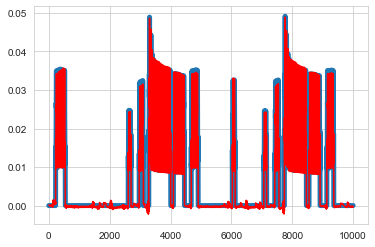

In [74]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = ml_testset3030.filter(regex='emission_value_out$') #nb.*out|
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Helper function for visualization 

In [44]:
import seaborn as sns
import matplotlib.pylab as plt
def make_heatmap_from_pd(result_dataframe,hour,hour_name = "hour",target_name = "emission_value"):
    result_1specieshour = result_dataframe.loc[result_dataframe[hour_name] == hour]
    result_1specieshour = result_1specieshour[["x","y",target_name]]
    #print(result_1specieshour)
    x = result_1specieshour["x"].max() - result_1specieshour["x"].min() + 1
    y = result_1specieshour["y"].max() - result_1specieshour["y"].min() + 1
    v = result_1specieshour[target_name].to_numpy().reshape((x, y))
    indices = result_1specieshour[["x", 'y']].to_numpy().T
    indices[0] = indices[0] - indices[0].min()
    indices[1] = indices[1] - indices[1].min()

    v = np.tile(np.nan, indices.max(axis=1)+1)
    v[tuple(indices)] = result_1specieshour[target_name]
    ax = sns.heatmap(v)
    plt.show()

### Adding predicted colmn and results visualization

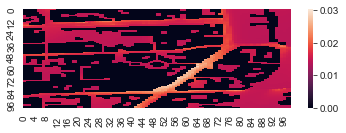

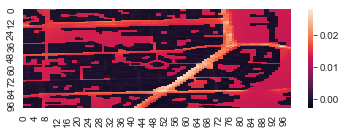

In [45]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 33
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Random Forest regressor

### Train on subset

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = RandomForestRegressor(max_depth=8)
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns)] , trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
lr_y_pred = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0012633668
MAE = 0.0005033718
Time to train = 0.53 seconds


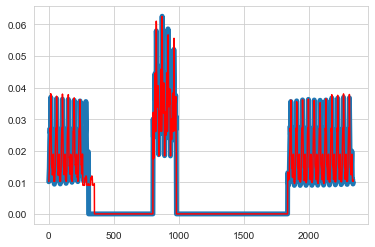

In [25]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.22))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0012620623
MAE = 0.0005867406
MAPE = 0.04%


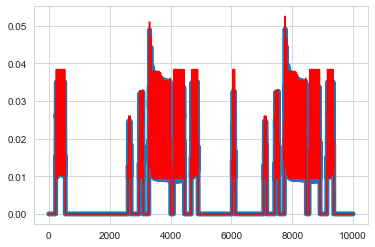

In [48]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = trainset.filter(regex='nb.*out|emission_value_out$')
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

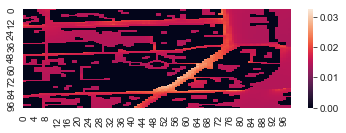

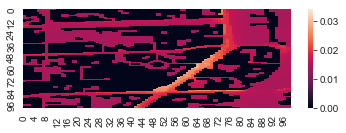

In [49]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## XGBoost

### Train on subset

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = GradientBoostingRegressor()
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns)], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
lr_y_pred = lr_model.predict(testset.loc[:,~trainset.columns.isin(filtered_columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0012853809
MAE = 0.0006543883
Time to train = 0.29 seconds


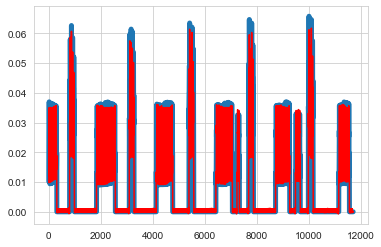

In [127]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.3))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0012853809
MAE = 0.0006689103
MAPE = 308679520043.52%


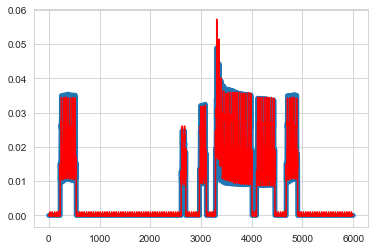

In [130]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,6000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

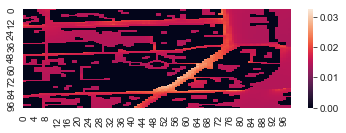

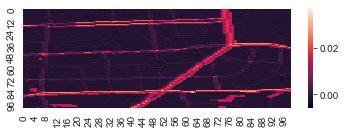

In [57]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Neural Network

In [33]:
# Here goes work with neural networks, but atm we jump to cutting nighttime information out, due to irrelevance

# Dataset without nighttime palm inputs and outputs

### Preparing datasets

In [50]:
day_spec1 = spec1_trainset.loc[(spec1_trainset["hour"]>=27) & (spec1_trainset["hour"]<=44)]
day_spec1

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
27,100,200,27,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.038015,0.000000,0.000000,0.037861,0.037880
28,100,200,28,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.035078,0.000000,0.000000,0.035003,0.034906
29,100,200,29,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.029295,0.000000,0.000000,0.029518,0.029462
30,100,200,30,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.027518,0.000000,0.000000,0.027671,0.027728
31,100,200,31,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.022723,0.000000,0.000000,0.022824,0.022817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079992,249,349,40,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.008415,0.008396,0.000000,0.008390
1079993,249,349,41,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.009018,0.008957,0.000000,0.008970
1079994,249,349,42,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.009607,0.009568,0.000000,0.009581
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.011800,0.011717,0.000000,0.011732


In [52]:
#parameters
window_size = 4
#trainset
day_trainset = day_spec1.copy()
day_trainset = day_trainset.loc[(day_trainset["x"]<= 150) & (day_trainset["y"]<=250)]
day_trainset_windowed_temp = reshape_to_window(day_trainset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=True,target_value="emission_value_out")
day_trainset_windowed_temp = day_trainset_windowed_temp.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)

#testset
day_testset = day_spec1.copy()
day_testset = day_spec1.loc[(day_spec1["x"]> 150) & (day_spec1["y"]>250)] # XXX Change it here
day_testset_windowed_temp = reshape_to_window(day_testset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=True,target_value="emission_value_out")
day_testset_windowed_temp = day_testset_windowed_temp.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)



In [53]:
filtered_columns = trainset.filter(regex='nb.*out|emission_value_out$')

day_trainset_target = day_trainset_windowed_temp["emission_value_out"]
day_trainset_windowed = day_trainset_windowed_temp.loc[:,~day_trainset_windowed_temp.columns.isin(filtered_columns.columns)]

day_testset_target = day_testset_windowed_temp["emission_value_out"]
day_testset_windowed = day_testset_windowed_temp.loc[:,~day_testset_windowed_temp.columns.isin(filtered_columns.columns)]
day_testset_windowed


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,151,251,19.335487,2.457334,27,0.0,0.0,0.0,0.0,0.0,0.000000,28,0.0,0.0,0.0,0.0,0.0,0.000000,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0
1,151,251,19.335487,2.457334,28,0.0,0.0,0.0,0.0,0.0,0.000000,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0
2,151,251,19.335487,2.457334,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0
3,151,251,19.335487,2.457334,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0
4,151,251,19.335487,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176410,249,349,0.000000,2.457334,37,0.0,0.0,0.0,0.0,0.0,0.011483,38,0.0,0.0,0.0,0.0,0.0,0.009946,39,0.0,0.0,0.0,0.0,0.0,0.008623,40,0.0,0.0,0.0,0.0,0.0
176411,249,349,0.000000,2.457334,38,0.0,0.0,0.0,0.0,0.0,0.009946,39,0.0,0.0,0.0,0.0,0.0,0.008623,40,0.0,0.0,0.0,0.0,0.0,0.008390,41,0.0,0.0,0.0,0.0,0.0
176412,249,349,0.000000,2.457334,39,0.0,0.0,0.0,0.0,0.0,0.008623,40,0.0,0.0,0.0,0.0,0.0,0.008390,41,0.0,0.0,0.0,0.0,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0
176413,249,349,0.000000,2.457334,40,0.0,0.0,0.0,0.0,0.0,0.008390,41,0.0,0.0,0.0,0.0,0.0,0.008970,42,0.0,0.0,0.0,0.0,0.0,0.009581,43,0.0,0.0,0.0,0.0,0.0


## Linear Regression

### Train on subset

In [54]:
day_lr_model = LinearRegression()
day_lr_model.fit(day_trainset_windowed,day_trainset_target)

LinearRegression()

### Test on subset

RMSE = 0.0031454589
MAE = 0.0018930924


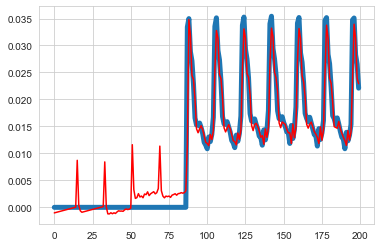

In [55]:
pred_day_testset_target = day_lr_model.predict(day_testset_windowed)

lr_y = day_testset_target
lr_y_pred = pred_day_testset_target
lr_residuals = day_testset_target - pred_day_testset_target
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals, 2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y, lr_y_pred))

(ystart, yend) = (0, 200)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y[ystart:yend], label="Actual y", linewidth=5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y_pred[ystart:yend], label="Predicted y", alpha=1, color="red")
plt.show()


### Visualiztion

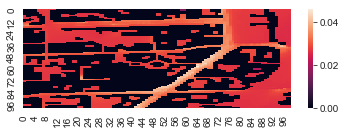

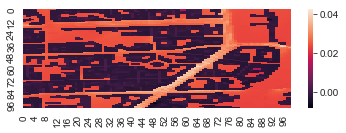

In [56]:
viz_ml = day_testset_windowed.copy()
viz_ml["pred_emission_value_out"] = lr_y_pred
viz_ml["emission_value_out"] = lr_y
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Random Forest Regressor

### Train on subset

In [57]:
day_rf_model = RandomForestRegressor()
day_rf_model.fit(day_trainset_windowed,day_trainset_target)

RandomForestRegressor()

### Test on subset

RMSE = 0.0038902611
MAE = 0.0011599241


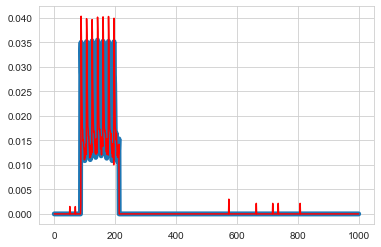

In [58]:
pred_day_testset_target = day_rf_model.predict(day_testset_windowed)

lr_y = day_testset_target
lr_y_pred = pred_day_testset_target
lr_residuals = day_testset_target - pred_day_testset_target
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals, 2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y, lr_y_pred))

(ystart, yend) = (0, 1000)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y[ystart:yend], label="Actual y", linewidth=5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y_pred[ystart:yend], label="Predicted y", alpha=1, color="red")
plt.show()

### Visualization

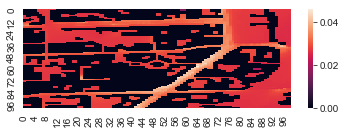

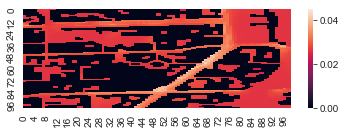

In [59]:
viz_ml = day_testset_windowed.copy()
viz_ml["pred_emission_value_out"] = lr_y_pred
viz_ml["emission_value_out"] = lr_y
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

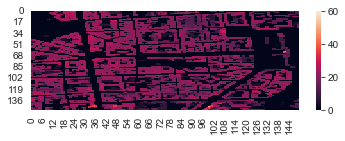

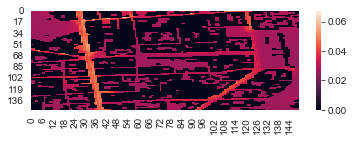

In [60]:
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(spec1_trainset,hour,hour_name="hour",target_name="building_height")
plt.subplot(2,1,2)
make_heatmap_from_pd(spec1_trainset,hour,hour_name="hour",target_name="emission_value_out")

# Rowwise proof. Test with artificially filled first hours

In [114]:
ml_testset3030.loc[(ml_testset3030["emission_value_out"]>=0.01) & (ml_testset3030["hour(3)"]==25)].describe()


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
count,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,198.048570,306.204721,0.182115,2.457334e+00,22.0,0.000029,0.000021,0.000034,0.000033,0.000025,0.022444,0.022638,0.023153,0.023038,0.026659,23.0,0.000033,0.000029,0.000035,0.000035,0.000030,0.021567,0.021743,0.022212,0.022104,0.025586,24.0,0.000038,0.000028,0.000045,0.000045,0.000031,0.021623,0.021812,0.022304,0.022186,0.025686,25.0,0.000021,0.000019,0.000024,0.000025,0.000017,0.025464
std,29.765346,30.087558,0.797417,4.441396e-16,0.0,0.000132,0.000112,0.000140,0.000141,0.000123,0.009835,0.009674,0.009183,0.009294,0.001389,0.0,0.000171,0.000167,0.000174,0.000174,0.000165,0.009437,0.009271,0.008782,0.008890,0.001094,0.0,0.000149,0.000132,0.000163,0.000166,0.000129,0.009445,0.009282,0.008799,0.008904,0.000905,0.0,0.000114,0.000108,0.000122,0.000123,0.000105,0.000712
min,151.000000,251.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019772,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019530,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019607,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.018690
25%,172.000000,279.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026031,0.026020,0.026106,0.026099,0.026309,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.024907,0.024890,0.024964,0.024958,0.025127,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025219,0.025213,0.025246,0.025263,0.025392,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025314
50%,194.000000,310.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026533,0.026527,0.026534,0.026543,0.026607,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025335,0.025318,0.025325,0.025334,0.025430,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025541,0.025540,0.025574,0.025581,0.025633,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025481
75%,227.000000,334.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026932,0.026947,0.026944,0.026944,0.027012,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025883,0.025885,0.025889,0.025885,0.025964,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025940,0.025977,0.026049,0.026010,0.026091,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025739
max,249.000000,349.000000,4.900400,2.457334e+00,22.0,0.001463,0.001463,0.001463,0.001463,0.001463,0.034337,0.037363,0.037363,0.037363,0.037363,23.0,0.002132,0.002132,0.002132,0.002132,0.002132,0.030223,0.031431,0.031431,0.030009,0.031431,24.0,0.001775,0.001775,0.001775,0.001775,0.001775,0.030537,0.031364,0.031364,0.030537,0.031364,25.0,0.001348,0.001348,0.001348,0.001318,0.001348,0.029470


In [64]:
filled_day_spec1 = fill_with_art_hours(day_testset.loc[day_testset["hour"]<=27],spec1_trainset,fill_value=0.034092,number_of_hours=3).sort_values(by = ['x', 'y','hour'], ascending = [True, True,True])
filled_day_spec1.to_csv("../data/filled_day_spec1.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
filled_day_spec1

  0%|          | 0/99 [00:00<?, ?it/s]

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
369672,151,251,24,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.025644,0.000000,0.000000,0.000000
369673,151,251,25,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.025644,0.000000,0.000000,0.000000
369674,151,251,26,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.025644,0.000000,0.000000,0.000000
369675,151,251,27,0.0,0.0,0.0,0.0,0.0,19.335487,2.457334,0.0,0.000000,0.000000,0.000000,0.000000
369720,151,252,24,0.0,0.0,0.0,0.0,0.0,18.477552,2.457334,0.0,0.025644,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079931,249,348,27,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.032280,0.032584,0.032437,0.032519
1079976,249,349,24,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.025644,0.025644,0.000000,0.025644
1079977,249,349,25,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.025644,0.025644,0.000000,0.025644
1079978,249,349,26,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.0,0.025644,0.025644,0.000000,0.025644


In [62]:
#filled_day_spec1 = pd.read_csv("../data/filled_day_spec1.csv",sep =";")


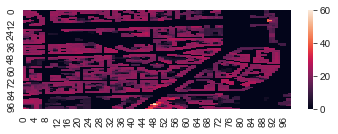

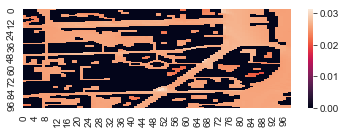

In [107]:
hour = 24
plt.subplot(2,1,1)
make_heatmap_from_pd(result_dataframe=filled_day_spec1,target_name="building_height",hour=hour)
plt.subplot(2,1,2)
make_heatmap_from_pd(result_dataframe=ml_testset3030,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

In [69]:
window_size = 4
sliding_day_spec1 = reshape_whole_table(filled_day_spec1.loc[filled_day_spec1["hour"]<=27],window_size,target_value="emission_value_out",drop_columns=["x","y","building_height","wind"],include_target=True)
sliding_day_spec1 = sliding_day_spec1.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
sliding_day_spec1

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,151,251,19.335487,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000
0,151,252,18.477552,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000
0,151,253,20.896000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,27,0.0,0.0,0.000193,0.0,0.0,0.000000
0,151,254,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,27,0.0,0.0,0.000537,0.0,0.0,0.000000
0,151,255,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,27,0.0,0.0,0.000151,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,249,345,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032695
0,249,346,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032644
0,249,347,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032584
0,249,348,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032519


In [100]:
filtered_columns = sliding_day_spec1.filter(regex='emission_value_out$').columns
pred_sliding_value = lr_model.predict(sliding_day_spec1.loc[:,~sliding_day_spec1.columns.isin(filtered_columns)])
sliding_day_spec1["pred_emission_value_out"] = list(pred_sliding_value)

In [101]:
sliding_day_spec1

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,pred_emission_value_out
count,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,198.048570,306.204721,0.182115,2.457334e+00,24.0,0.000038,0.000028,0.000045,0.000045,0.000031,0.020790,0.020883,0.021273,0.021244,0.024300,25.0,0.000021,0.000019,0.000024,0.000025,0.000017,0.020790,0.020883,0.021273,0.021244,0.024300,26.0,0.000072,0.000056,0.000083,0.000084,0.000059,0.020790,0.020883,0.021273,0.021244,0.024300,27.0,0.000389,0.000299,0.000449,0.000452,0.000326,0.034092,0.023419
std,29.765346,30.087558,0.797417,4.441396e-16,0.0,0.000149,0.000132,0.000163,0.000166,0.000129,0.010047,0.009972,0.009644,0.009669,0.005716,0.0,0.000114,0.000108,0.000122,0.000123,0.000105,0.010047,0.009972,0.009644,0.009669,0.005716,0.0,0.000267,0.000238,0.000287,0.000292,0.000229,0.010047,0.009972,0.009644,0.009669,0.005716,0.0,0.001446,0.001285,0.001568,0.001591,0.001279,0.003300,0.005581
min,151.000000,251.000000,0.000000,2.457334e+00,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.017939,-0.000601
25%,172.000000,279.000000,0.000000,2.457334e+00,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,26.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032264,0.024084
50%,194.000000,310.000000,0.000000,2.457334e+00,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,26.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033631,0.024426
75%,227.000000,334.000000,0.000000,2.457334e+00,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,26.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025644,0.025644,0.025644,0.025644,0.025644,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035529,0.024744
max,249.000000,349.000000,4.900400,2.457334e+00,24.0,0.001775,0.001775,0.001775,0.001775,0.001775,0.025644,0.025644,0.025644,0.025644,0.025644,25.0,0.001348,0.001348,0.001348,0.001318,0.001348,0.025644,0.025644,0.025644,0.025644,0.025644,26.0,0.003177,0.003177,0.003177,0.003177,0.002846,0.025644,0.025644,0.025644,0.025644,0.025644,27.0,0.015405,0.014910,0.015405,0.015405,0.014910,0.054037,0.034630


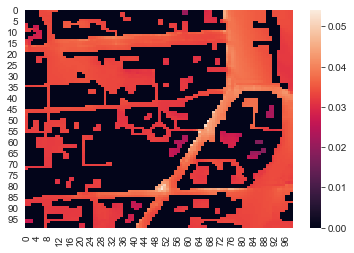

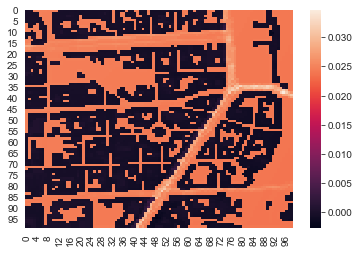

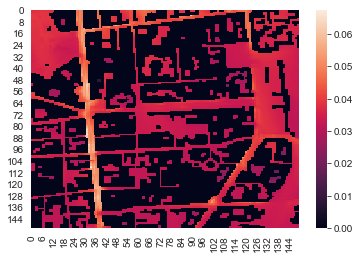

In [102]:
hour = 27

make_heatmap_from_pd(result_dataframe=sliding_day_spec1,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=sliding_day_spec1,target_name="pred_emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=spec1_trainset,target_name="emission_value_out",hour=hour,hour_name="hour")



## Usage of chained_predict method

In [ ]:
chained_result = chained_predict(lr_model,spec1_trainset,sliding_day_spec1,max_hour=35) # add ihour processed
chained_result

In [133]:
chained_result.to_csv("../data/chained_result_LR_30max.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')

In [86]:
test = test
test

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,pred_emission_value_out
0,201,301,20.702538,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.000195,0.000000,0.0,0.000132,0.0,0.000000,0.0
1,201,302,21.290546,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.000000,0.000221,0.0,0.000195,0.0,0.000000,0.0
2,201,303,20.624290,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,201,304,21.006519,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,27,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,201,305,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19203,249,345,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.000000,0.000000,0.0,0.000000,0.0,0.013951,0.0
19204,249,346,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.000000,0.000000,0.0,0.000000,0.0,0.013950,0.0
19205,249,347,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.000000,0.000000,0.0,0.000000,0.0,0.013949,0.0
19206,249,348,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.000000,0.000000,0.0,0.000000,0.0,0.013950,0.0


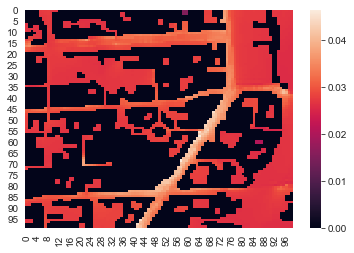

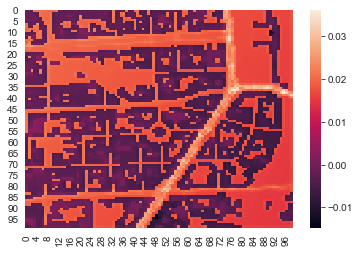

In [123]:
hour = 31

make_heatmap_from_pd(result_dataframe=chained_result,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=chained_result,target_name="pred_emission_value_out",hour=hour,hour_name="hour(3)")

In [124]:
diff = chained_result["emission_value_out"] - chained_result["pred_emission_value_out"]

In [125]:
import statistics

print(f"Mean value of real emissions is {statistics.mean(chained_result['emission_value_out'])}\n")
print(f"Mean absolute error  is {mean_absolute_error(chained_result['emission_value_out'],chained_result['pred_emission_value_out'])}")

Mean value of real emissions is 0.014565394394200055

Mean absolute error  is 0.007342385459790489


0.01470915910339984